# Exercise 6

Alissa Trujillo<br>
July 11, 2022<br>
DSC 530<br>
Week 6: Relationships Between Variables

## Exercise 7-1

In [58]:
import nsfg
import first
import numpy as np
import math
import thinkstats2
import thinkplot

In [44]:
from nsfg import ReadFemPreg
df = ReadFemPreg()

**Plotting a Scatterplot**

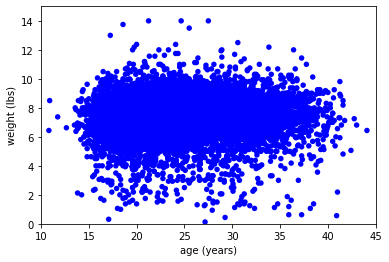

In [50]:
live = df[df.outcome == 1]
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

ages = live.agepreg
weights = live.totalwgt_lb

thinkplot.Scatter(ages, weights, alpha = 1.0)
thinkplot.Config(xlabel = "age (years)", ylabel = "weight (lbs)",
                xlim = [10,45], ylim = [0, 15], legend = False)

**Plotting a Percentile Graph**

In [48]:
def BinnedPercentiles(df):
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

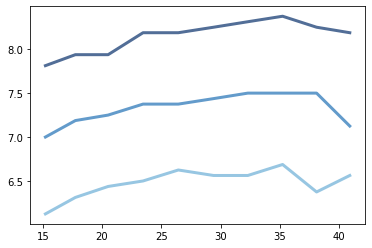

In [49]:
BinnedPercentiles(live)

**Correlations**

In [43]:
from thinkstats2 import Corr

Corr(live.agepreg, live.totalwgt_lb)

0.06883397035410908

The Pearson's correlation between a woman' age at pregnancy and the total weight of the baby in pounds is 0.07.

In [42]:
from thinkstats2 import SpearmanCorr

SpearmanCorr(live.agepreg, live.totalwgt_lb)

0.09461004109658226

The Spearman Correlation between a woman's age at pregnancy and the total weight of the baby in pounds is 0.09.

**Analysis**

Looking at the scatterplot, it is difficult to draw any conclusions as all of the points are fairly clumped together. The two correlation tests indicate that there is a very small linear correlation between the two variables. <br>

When we plot the percentiles, we can see that there is an upwards linear trend from ages 15 to 25. The trend flattens out a bit after the age of 25. This indicates that birth weight increases as mother's age increases in this particular 10 year age range.<br>

The variation between the Pearson's Correlation and Spearman's correlation are likely due to all of the outliers that are visible in the data via the scatterplot. Spearman's correlation is a more robust method for measuring correlation that accounts for the presence of outliers, meaning that the higher value for this measure shows that the effect is higher without the presence of outliers.

## Exercise 8-1

**Are x bar and the median biased?**

In [74]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [83]:
def Experiment1(n=7, m=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        estimates1.append(xbar)
        estimates2.append(median)
        
    print('mean error x bar', MeanError(estimates1, mu))
    print('mean error median', MeanError(estimates2, mu))

In [90]:
Experiment1(n=7, m=1000)

mean error x bar 0.004270288275041096
mean error median 0.0064438932945498914


In [91]:
Experiment1(n=7, m=10000)

mean error x bar 0.00827602290058474
mean error median 0.010423173400361512


**Results:** The mean error of x bar varies wildly between each attempt of running the experiment, and frequently presents negative values  when m is increased. This looks to me like it is biased, since it depends too heavily on the sample and sometimes will provide negative results. The mean error of the median tends to be on average much closer to 0, and continues to get closer to 0 as m increases, meaning that it is less biased.

**Does S2 or S2(n-1) yield a lower MSE?**

In [61]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [64]:
import random

def Experiment2(n=7, m=1000):
    mu = 0
    sigma = 1
    
    var1 = []
    var2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        s2 = np.var(xs)
        s2n1 = np.var(xs, ddof = 1)
        var1.append(s2)
        var2.append(s2n1)
    
    print('rmse S2', RMSE(var1, sigma**2))
    print('rmse S2(n-1)', RMSE(var2, sigma**2))

In [71]:
Experiment2(n=7, m=1000)

rmse S2 0.5080945685351165
rmse S2(n-1) 0.5666650659727369


**Results:** S2 has a lower mean squared error than the unbiased estimator.

## Exercise 8-2

In [112]:
def SimulateSample(lam=2, n=10, repeat=1000):
    estimates = []
    for _ in range(repeat):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)

In [115]:
SimulateSample(lam=2, n=10, repeat=1000)

standard error 0.8683493938584602
confidence interval (1.2366682762238719, 3.726812752357238)


(10, 0.8683493938584602)

In [116]:
SimulateSample(lam=2, n=100, repeat=1000)

standard error 0.20648779985622076
confidence interval (1.722759343364934, 2.3916046449207813)


(100, 0.20648779985622076)

In [133]:
SimulateSample(lam=2, n=1000, repeat=1000)

standard error 0.06132870511472251
confidence interval (1.896195378302715, 2.1024114962970857)


(1000, 0.06132870511472251)

In [134]:
SimulateSample(lam=2, n=10000, repeat=1000)

standard error 0.01934855402973343
confidence interval (1.9684198834577133, 2.0311348887446647)


(10000, 0.01934855402973343)

**Sample Size**

As sample size, n, increases, the standard error decreases. There is a very steep decrease between 10 and 100, which gets less steep as n increases further.

**Confidence Intervals**

The confidence intervals get smaller as n increases, closing in on the true value of 2. All confidence intervals contain this value.

**Plotting Standard Error vs. n**

In [135]:
ns = [10, 100, 1000, 10000]
stderrs = [0.8683493938584602, 0.20648779985622076, 
           0.06132870511472251, 0.01934855402973343]

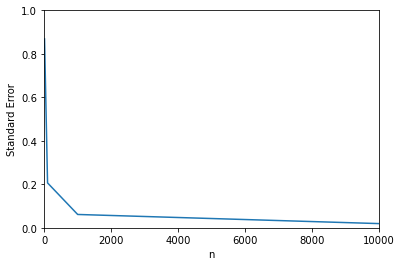

In [136]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

plt.plot(ns, stderrs)
plt.xlim(0, 10000)
plt.ylim(0,1)
plt.xlabel("n")
plt.ylabel("Standard Error")
plt.show()

We can see the standard error drastically decrease as we increase n. The effect is much more profound with the lower values of n, but once it hits 1000 or so, we are not seeing as fruitful of results from obtaining more samples. This is important in real life experiments when we must expend resources to obtain higher sample sizes.